(image-segmentation:thresholding)=
# Thresholding
Thresholding is a technique of image segmentation. It separates a given single-channel image (or stack) into two regions: Pixels with intensity below a given threshold, also called "background" and pixels with intensity above a given threshold, "foreground". Typically those algorithms result in binary images where background intensity is 0 and foreground intensity is 1. When applying such algorithms in ImageJ, foreground pixels are 255. In scikit-image, background pixels are `False` and foreground pixels are `True`.

See also
* [Thresholding (wikipedia)](https://en.wikipedia.org/wiki/Thresholding_(image_processing))
* [Threshold algorithms in scikit-image](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html)

In [1]:
from skimage.io import imread
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle

from skimage import filters
from skimage.filters import try_all_threshold
from matplotlib import pyplot as plt
import napari_simpleitk_image_processing as nsitk

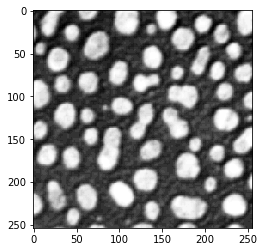

In [2]:
image = imread("../../data/blobs.tif")
imshow(image)

## Image segmentation by thresholding
The [threshold_otsu](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_otsu) operation, also known as Otsu's method (Otsu et al., IEEE Transactions on Systems, Man, and Cybernetics, Vol. 9 (1), 1979), delivers a number - the threshold to be applied.

In [3]:
threshold = filters.threshold_otsu(image)

When using methods such as thresholding in notebooks, it is recommended to print out the result to see what it actually returns. Here, we are using the method from scikit-image, which returns the threshold that is applied. Printing that threshold can be helpful later when reproducing the workflow, also if others want to apply the same threshold to the dataset in other software.

In [4]:
threshold

120

Using numpy arrays, we can apply the threshold by applying the `>=` operator. The result will be a binary image.

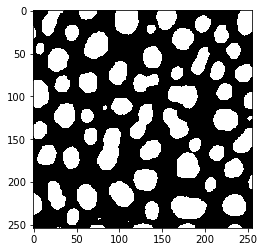

In [5]:
binary_image = image >= threshold

imshow(binary_image)

We can also determine in which type the binary image is processed by printing out minimum and maximum of the image:

In [6]:
binary_image.max()

True

In [7]:
binary_image.min()

False

As shown earlier, matplotlib allows us to draw an outline on top of an image visualized using `imshow` using the `contour` command.

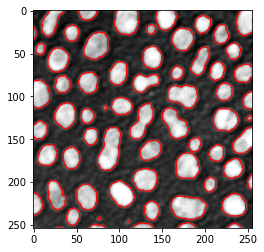

In [8]:
# create a new plot
fig, axes = plt.subplots(1,1)

# add two images
axes.imshow(image, cmap=plt.cm.gray)
axes.contour(binary_image, [0.5], linewidths=1.2, colors='r')

There is a list of [thresholding algorithms](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html) available. It is possible to apply them all to your data and see differences:

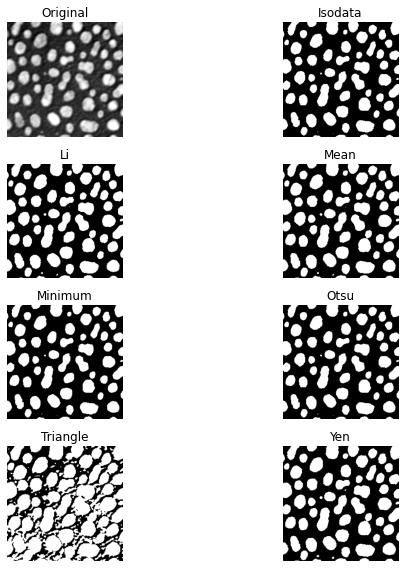

In [9]:
fig, ax = try_all_threshold(image, figsize=(10, 8), verbose=False)
plt.show()

## Thresholding using pyclesperanto
Furthermore, also other libraries such as [pyclesperanto](https://github.com/clesperanto/pyclesperanto_prototype/) offer thresholding algorithms. The implementation here does not return the threshold, it directly returns the binary image.

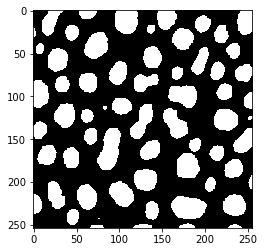

In [10]:
binary_image2 = cle.threshold_otsu(image)
imshow(binary_image2)

Here we can also see that different libraries store binary images in different ways. pyclesperanto for example stores the positive pixels in binary images not as `True` but with a `1` instead:

In [11]:
binary_image2.max()

1.0

In [12]:
binary_image2.min()

0.0

## Thresholding using SimpleITK
Also [SimpleITK](https://simpleitk.readthedocs.io/) offers thresholding algorithms which can be found in the [list of filters](https://simpleitk.readthedocs.io/en/master/filters.html). For scripting convenience, we use here [napari-simpleitk-image-processing](https://github.com/haesleinhuepf/napari-simpleitk-image-processing) a scriptable napari plugin that offers some SimpleITK functions in a more accessible way. We can program a small for-loop that tries all the thresholding alogrithms in SimpleITK and shows us the results:

threshold_huang


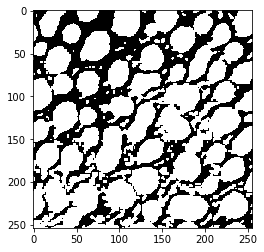

threshold_intermodes


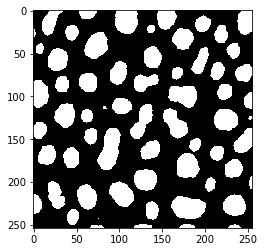

threshold_isodata


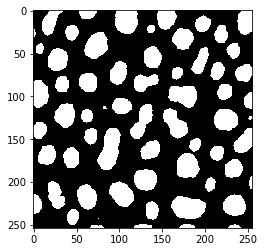

threshold_kittler_illingworth


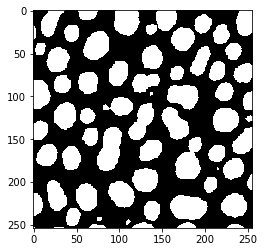

threshold_li


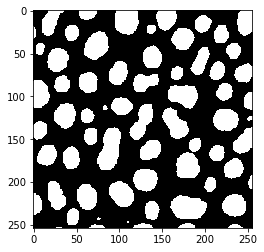

threshold_maximum_entropy


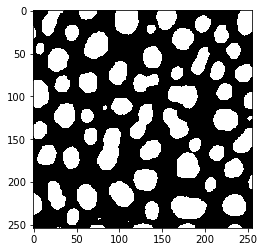

threshold_moments


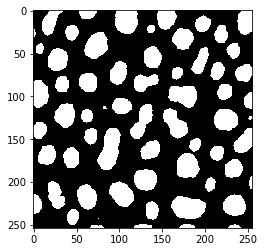

threshold_otsu


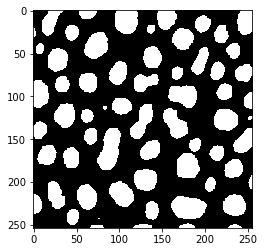

threshold_renyi_entropy


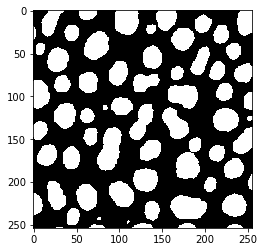

threshold_shanbhag


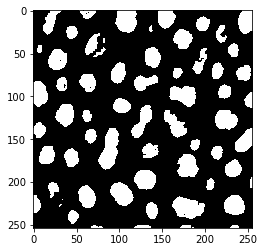

threshold_triangle


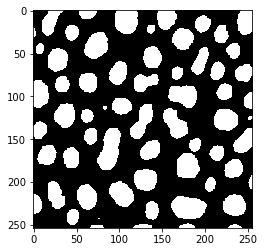

threshold_yen


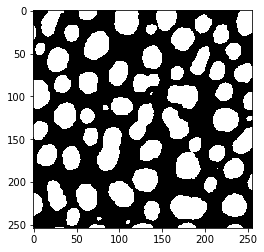

In [13]:
threshold_algorithms = [
    nsitk.threshold_huang,
    nsitk.threshold_intermodes,
    nsitk.threshold_isodata,
    nsitk.threshold_kittler_illingworth,
    nsitk.threshold_li,
    nsitk.threshold_maximum_entropy,
    nsitk.threshold_moments,
    nsitk.threshold_otsu,
    nsitk.threshold_renyi_entropy,
    nsitk.threshold_shanbhag,
    nsitk.threshold_triangle,
    nsitk.threshold_yen
]

for algorithm in threshold_algorithms:
    # show name of algorithm above the image
    print(algorithm.__name__)
    
    # binarize the image using the given algorithm
    binary_image = algorithm(image)
    
    # show the segmentation result
    imshow(binary_image)

# Exercise
Segment blobs.tif using the Yen algorithm. Use matplotlib to draw a green outline of the segmented objects around the regions on the original image.

Segment the image using a calculated threshold according to this equation:

In [ ]:
threshold = mean + 2 * standard_deviation

Visualize the resulting segmentation with a red outline on top of the original image and the green outline from above.

Alternatively, put both segmentation results in napari and compare it there visually.